In [1]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_name = "/data/lisa/data/genomics/TCGA/BRCA_coexpr.hdf5"
data = h5py.File(file_name, 'r')

In [3]:
# Our key:
print data.keys()

[u'expression_data', u'gene_names', u'graph_data', u'labels_data', u'sample_names']


In [4]:
# Examples:

for k in data.keys():
    print "For {}, shape: {}, ex: {}".format(k, data[k].shape, data[k][0])


For expression_data, shape: (1247, 7220), ex: [ 10.54170036  10.70660019  11.83230019 ...,   0.875        0.          10.84619999]
For gene_names, shape: (7220,), ex: RNF14
For graph_data, shape: (7220, 7220), ex: [ 0.  0.  0. ...,  0.  0.  0.]
For labels_data, shape: (1247, 8), ex: [ 0.  0.  0.  1.  0.  0.  0.  0.]
For sample_names, shape: (1247,), ex: TCGA-OL-A66H-01


In [5]:
dict(data['labels_data'].attrs)

{u'0': 'Infiltrating Ductal Carcinoma',
 u'1': 'Infiltrating Carcinoma NOS',
 u'2': 'Metaplastic Carcinoma',
 u'3': 'Mucinous Carcinoma',
 u'4': 'Other',
 u'5': 'Mixed Histology (please specify)',
 u'6': 'Medullary Carcinoma',
 u'7': 'Infiltrating Lobular Carcinoma',
 u'Infiltrating Carcinoma NOS': 1,
 u'Infiltrating Ductal Carcinoma': 0,
 u'Infiltrating Lobular Carcinoma': 7,
 u'Medullary Carcinoma': 6,
 u'Metaplastic Carcinoma': 2,
 u'Mixed Histology (please specify)': 5,
 u'Mucinous Carcinoma': 3,
 u'Other': 4}

In [7]:
np.array(data['labels_data']).sum(0)

array([ 901.,    1.,    9.,   18.,   54.,   40.,    8.,  216.], dtype=float32)

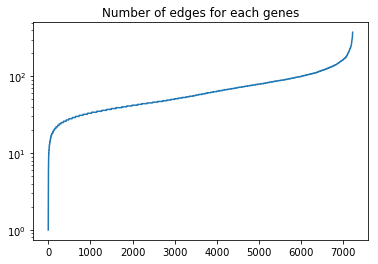

On average: 68.6559556787


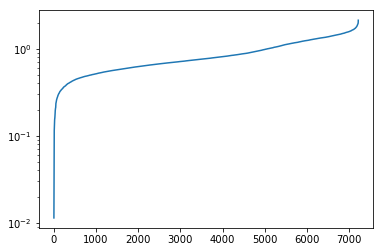

On average: 0.856683969498


In [9]:
nb_edges = (np.array(data['graph_data']) > 0.00).sum(axis=0)
plt.semilogy(np.sort(nb_edges))
plt.title("Number of edges for each genes")
plt.show()
print "On average: {}".format(nb_edges.mean(axis=0))

nb_edges = (np.array(data['graph_data'])).sum(axis=0)
plt.semilogy(np.sort(nb_edges))
plt.show()
print "On average: {}".format(nb_edges.mean(axis=0))

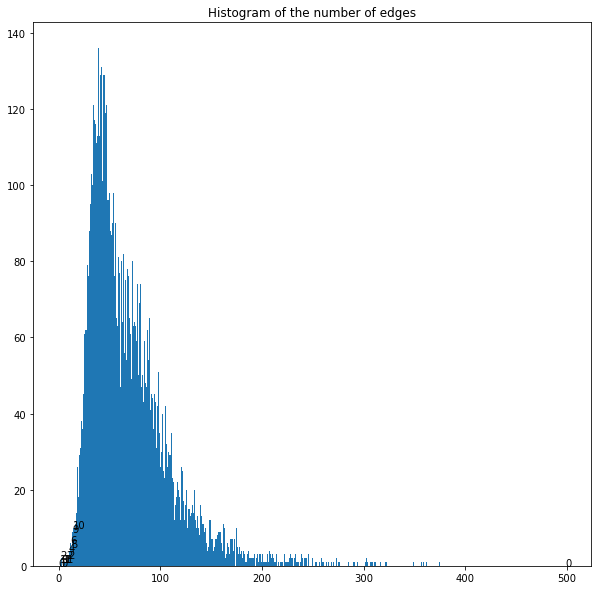

[0 1 2 0 1 1 1 2 1 2]


In [12]:
max_show = 500


# The histogram of edges
nb_edges = (np.array(data['graph_data']) > 0.0).sum(axis=0)
for i in range(nb_edges.shape[0]):
    if nb_edges[i] > max_show:
        nb_edges[i] = max_show
        print "change for ", i


my_bins =  range(max_show)
plt.figure(figsize=(10,10))
arr = plt.hist(np.minimum(nb_edges, max_show-1), bins=my_bins)#[0, 2, 5, 10, 100, 1000])
for i in range(15) + [max_show-2]:
    plt.text(arr[1][i], arr[0][i], str(int(arr[0][i])))
    
plt.title("Histogram of the number of edges")
plt.show()

    
print np.histogram(np.minimum(nb_edges, max_show), range(max_show))[0][:10]
# If we compare to an image, the number of neighbors is = filter_size **2 (i.e. usually 4, 9, 25)

In [11]:
a = (np.array(data['graph_data']) > 0.0).sum(axis=0)
arg_a = np.argsort(a)

for i in arg_a[-10:]:
    print "{} (id {}): {} edges.".format(data['gene_names'][i], i,  a[i]) 

print "..."

for i in arg_a[:10]:
    print "{} (id {}): {} edges.".format(data['gene_names'][i], i,  a[i]) 

COL3A1 (id 5880): 310 edges.
COL6A2 (id 4039): 311 edges.
CCT7 (id 3290): 316 edges.
SERPING1 (id 5241): 321 edges.
DDX21 (id 706): 322 edges.
ISLR (id 4459): 349 edges.
HLA-DPA1 (id 171): 356 edges.
HLA-DRA (id 6376): 358 edges.
SPARCL1 (id 3328): 361 edges.
C1S (id 4748): 374 edges.
...
CGB8 (id 4923): 1 edges.
HIST1H2AI (id 5835): 2 edges.
AKR1C2 (id 3417): 2 edges.
HSPA1B (id 6271): 4 edges.
PDE4C (id 7064): 5 edges.
AMY2B (id 3139): 6 edges.
HIST2H2AA3 (id 299): 7 edges.
C22orf29 (id 4026): 7 edges.
RIC8A (id 4791): 8 edges.
GOLGA6B (id 5801): 9 edges.
